Step 1) Install and Import dependencies.
Done

In [5]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as mp

step 2) read in images or video

In [54]:
IMAGE_PATH= 'silent.jpeg'

In [55]:
reader= easyocr.Reader(['en'],gpu=False)
result= reader.readtext(IMAGE_PATH)
result
# after this go execute the last one in step 4 for multiple lines of text in image.

Using CPU. Note: This module is much faster with a GPU.


[([[8, 64], [217, 64], [217, 151], [8, 151]], 'Silent', 0.9998768221466281)]

step 3) Drawing results using openCv ( for single line text)

In [46]:
# we will now need coordinates to plot in openCv. We need top left and bottom right. Above answer given out refers to 4 coordinates
# then the understood text and lastly the confidence.
top_left = tuple(result[0][0][0]) #opencv expects tuple
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font=cv2.FONT_HERSHEY_SIMPLEX
# These are according to the format in which result comes out.


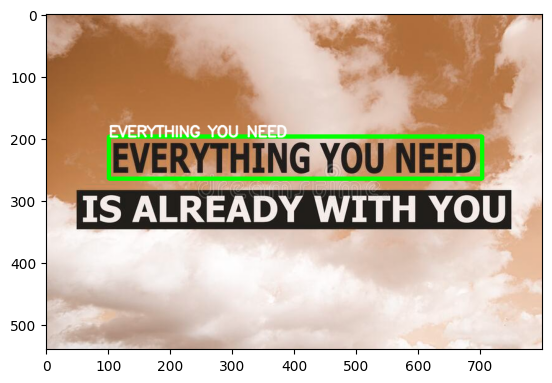

In [45]:
# Now we have to visualize
img= cv2.imread(IMAGE_PATH)
img= cv2.rectangle(img, top_left, bottom_right, (0,255,0),5)
img= cv2.putText(img,text,top_left, font, .8, (255,255,255),2, cv2.LINE_AA) # 255,255,255 is color white in rgb
plt.imshow(img)
plt.show()

step 4) handling multiple lines of text in image

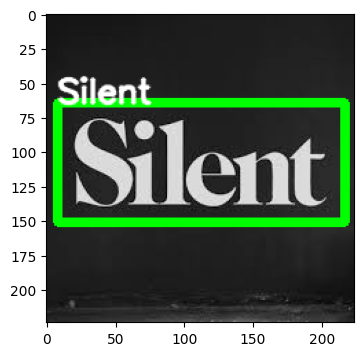

In [57]:
# We require to loop through the result in order to get every line detected.
img= cv2.imread(IMAGE_PATH)
for line in result:
  top_left = tuple(line[0][0]) 
  bottom_right = tuple(line[0][2])
  text = line[1]
  font=cv2.FONT_HERSHEY_SIMPLEX
  img= cv2.rectangle(img, top_left, bottom_right, (0,255,0),5)
  img= cv2.putText(img,text,top_left, font, .8, (255,255,255),2, cv2.LINE_AA) # 255,255,255 is color white in rgb
plt.figure(figsize=(4,4))
plt.imshow(img)
plt.show()